No GPU found. Using CPU.
Generating mock dataset...
  - Generating samples for 'Fist' gesture...
  - Generating samples for 'Open Hand' gesture...
  - Generating samples for 'Peace Sign' gesture...
Dataset generation complete.

Building and training the model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,827 (2.46 MB)

 Trainable params: 645,827 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.6765 - loss: 0.6386 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 2.4046e-04
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 1.0000 - loss: 2.6104e-04 - val_accuracy: 1.0000 - val_loss: 1.1812e-04
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 1.0000 - loss: 1.4997e-04 - val_accuracy: 1.0000 - val_loss: 6.2334e-05
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 1.0000 - loss: 7.3992e-05 - val_accuracy: 1.0000 - val_loss: 4.8346e-05
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 1.0000 - loss: 4.2176e-05 - val_accuracy: 1.0000 - val_loss: 4.7064e-05
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 1.0000 - loss: 3.4587e-05 - val_accuracy: 1.0000 - val_loss: 3.2538e-05
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step 

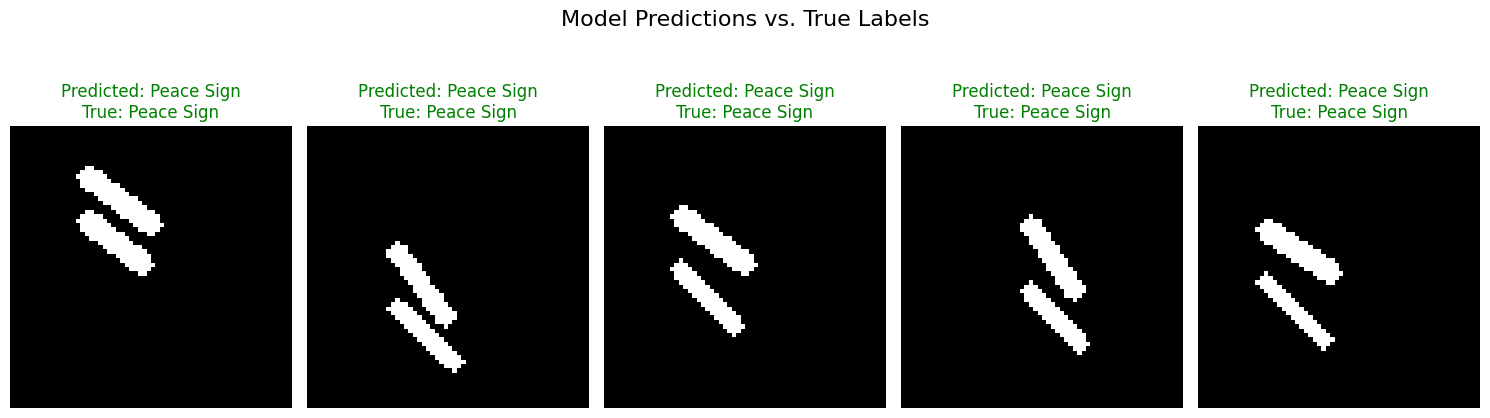


Script execution finished successfully.


In [1]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2


def create_mock_dataset(num_samples_per_class=1000, img_size=(64, 64)):
    """
    Generates a mock dataset of images and labels for hand gesture recognition.

    Args:
        num_samples_per_class (int): Number of images to generate for each gesture class.
        img_size (tuple): The width and height of the generated images.

    Returns:
        tuple: A tuple containing preprocessed images (numpy array) and one-hot encoded labels (numpy array).
    """
    gesture_classes = ["Fist", "Open Hand", "Peace Sign"]
    num_classes = len(gesture_classes)
    images = []
    labels = []

    print("Generating mock dataset...")

    for i, gesture in enumerate(gesture_classes):
        print(f"  - Generating samples for '{gesture}' gesture...")
        for _ in range(num_samples_per_class):

            img = np.zeros(img_size, dtype=np.uint8)
            img_h, img_w = img_size


            if gesture == "Fist":

                center = (np.random.randint(img_w // 4, 3 * img_w // 4),
                          np.random.randint(img_h // 4, 3 * img_h // 4))
                radius = np.random.randint(img_w // 6, img_w // 4)
                cv2.circle(img, center, radius, 255, -1)
            elif gesture == "Open Hand":

                top_left = (np.random.randint(img_w // 8, img_w // 2),
                            np.random.randint(img_h // 8, img_h // 2))
                bottom_right = (top_left[0] + np.random.randint(img_w // 4, img_w // 2),
                                top_left[1] + np.random.randint(img_h // 4, img_h // 2))
                cv2.rectangle(img, top_left, bottom_right, 255, -1)
            elif gesture == "Peace Sign":

                pt1 = (np.random.randint(img_w // 8, img_w // 2),
                       np.random.randint(img_h // 8, img_h // 2))
                pt2 = (pt1[0] + np.random.randint(img_w // 6, img_w // 4),
                       pt1[1] + np.random.randint(img_h // 6, img_h // 4))
                cv2.line(img, pt1, pt2, 255, 3)

                pt3 = (pt1[0], pt1[1] + np.random.randint(img_h // 6, img_h // 4))
                pt4 = (pt3[0] + np.random.randint(img_w // 6, img_w // 4),
                       pt3[1] + np.random.randint(img_h // 6, img_h // 4))
                cv2.line(img, pt3, pt4, 255, 3)

            images.append(img)
            labels.append(i)

    images = np.array(images, dtype='float32')
    labels = np.array(labels)


    images = np.expand_dims(images, axis=-1)


    images /= 255.0


    one_hot_labels = keras.utils.to_categorical(labels, num_classes=num_classes)

    print("Dataset generation complete.")
    return images, one_hot_labels, gesture_classes


def build_and_train_model(images, labels, num_classes, img_size):
    """
    Builds, compiles, and trains a CNN model.

    Args:
        images (np.array): The input image data.
        labels (np.array): The one-hot encoded labels.
        num_classes (int): The number of gesture classes.
        img_size (tuple): The dimensions of the input images.

    Returns:
        keras.Model: The trained model.
    """

    split_index = int(0.8 * len(images))
    train_images, test_images = images[:split_index], images[split_index:]
    train_labels, test_labels = labels[:split_index], labels[split_index:]

    print("\nBuilding and training the model...")

    model = keras.Sequential([

        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),

        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),

        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),

        layers.Flatten(),

        layers.Dense(64, activation='relu'),

        layers.Dense(num_classes, activation='softmax')
    ])


    model.compile(optimizer='adam',
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])


    model.summary()


    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))


    loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
    print(f"\nModel evaluation on test data:")
    print(f"  - Test Loss: {loss:.4f}")
    print(f"  - Test Accuracy: {accuracy * 100:.2f}%")

    return model, test_images, test_labels


def make_predictions_and_visualize(model, images, labels, gesture_classes):
    """
    Makes predictions on a set of images and visualizes the results.

    Args:
        model (keras.Model): The trained model.
        images (np.array): The image data to predict on.
        labels (np.array): The true labels for the images.
        gesture_classes (list): A list of the gesture class names.
    """
    print("\nMaking predictions and visualizing results...")


    num_predictions_to_show = 5
    indices = np.random.choice(len(images), num_predictions_to_show, replace=False)
    sample_images = images[indices]
    sample_true_labels = np.argmax(labels[indices], axis=1)


    predictions = model.predict(sample_images)
    predicted_labels = np.argmax(predictions, axis=1)


    plt.figure(figsize=(15, 5))
    plt.suptitle("Model Predictions vs. True Labels", fontsize=16)

    for i in range(num_predictions_to_show):
        plt.subplot(1, num_predictions_to_show, i + 1)

        plt.imshow(sample_images[i].reshape(64, 64), cmap='gray')


        predicted_gesture = gesture_classes[predicted_labels[i]]
        true_gesture = gesture_classes[sample_true_labels[i]]

        color = 'green' if predicted_gesture == true_gesture else 'red'
        title = f"Predicted: {predicted_gesture}\nTrue: {true_gesture}"
        plt.title(title, color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    try:

        physical_devices = tf.config.list_physical_devices('GPU')
        if physical_devices:
            print(f"Using GPU: {physical_devices[0]}")
        else:
            print("No GPU found. Using CPU.")


        IMAGE_SIZE = (64, 64)
        NUM_CLASSES = 3

        images, labels, gesture_classes = create_mock_dataset(img_size=IMAGE_SIZE)

        trained_model, test_images, test_labels = build_and_train_model(
            images, labels, NUM_CLASSES, IMAGE_SIZE
        )


        make_predictions_and_visualize(trained_model, test_images, test_labels, gesture_classes)

        print("\nScript execution finished successfully.")

    except Exception as e:
        print(f"An error occurred: {e}")